In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, SimpleRNN

import matplotlib.pyplot as plt


from tensorflow.keras.optimizers import Adam


In [2]:
url = ('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
csv_path = tf.keras.utils.get_file("twitter_sentiment.csv", url)
df = pd . read_csv (csv_path)
tweets = df['tweet']
labels = df['label']

In [3]:
def cargar_datos(max_features=10000, maxlen=300):
    url = 'https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv'
    csv_path = tf.keras.utils.get_file("twitter_sentiment.csv", url)
    df = pd.read_csv(csv_path)

    tweets = df['tweet']
    labels = df['label']

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(tweets)
    sequences = tokenizer.texts_to_sequences(tweets)

    x_data = pad_sequences(sequences, maxlen=maxlen)
    y_data = labels.values

    ros = RandomOverSampler()
    x_data_res, y_data_res = ros.fit_resample(x_data, y_data)

    x_data_res = np.expand_dims(x_data_res, axis=-1)

    x_train, x_test, y_train, y_test = train_test_split(
        x_data_res, y_data_res, test_size=0.2, random_state=42, stratify=y_data_res
    )

    return x_train, x_test, y_train, y_test, tokenizer


In [ ]:
model.summary()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler

# Hiperparámetros
maxlen = 300
max_features = 10000
batch_size = 64
epochs = 10

# Función para cargar los datos (la parte de tokenización y preparación)
def cargar_datos(maxlen=300):
    url = ('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
    csv_path = tf.keras.utils.get_file("twitter_sentiment.csv", url)
    df = pd.read_csv(csv_path)
    tweets = df['tweet']
    labels = df['label']

    # Tokenización y padding
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(tweets)
    sequences = tokenizer.texts_to_sequences(tweets)
    x_data = pad_sequences(sequences, maxlen=maxlen)
    y_data = labels.values

    # Split Train/Test
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

    return x_train, x_test, y_train, y_test, tokenizer

# Cargar datos
x_train, x_test, y_train, y_test, tokenizer = cargar_datos(maxlen=maxlen)

# Crear modelo RNN
RNN_model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilamos el modelo
RNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Aplicar oversampling a los datos
ros = RandomOverSampler(random_state=42)

# Aplanamos para usar oversampling
x_train_flat = x_train.reshape((x_train.shape[0], -1))  # Aplanamos x_train antes del oversampling
x_resampled, y_resampled = ros.fit_resample(x_train_flat, y_train)

# Vuelvo a reshape para la entrada del modelo (sin agregar una dimensión extra de características)
x_resampled = x_resampled.reshape((-1, maxlen))  # Solo necesitamos (samples, timesteps)
x_test = x_test.reshape((-1, maxlen))  # Igualmente para el test

# Entrenar el modelo
history = RNN_model.fit(x_resampled, y_resampled, batch_size=batch_size, epochs=epochs, validation_split=0.2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.8243 - loss: 0.3649 - val_accuracy: 0.9772 - val_loss: 0.0825
Epoch 2/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9924 - loss: 0.0290 - val_accuracy: 0.9953 - val_loss: 0.0159
Epoch 3/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9976 - loss: 0.0104 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 4/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy: 0.9754 - val_loss: 0.0634
Epoch 5/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9842 - loss: 0.0456 - val_accuracy: 0.9940 - val_loss: 0.0172
Epoch 6/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9982 - loss: 0.0074 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 7/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 8/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9989 - loss: 0.0039 - 

In [5]:
# 5. Evaluación
loss, accuracy = RNN_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f} - Test Accuracy: {accuracy:.4f}")


Test Loss: 0.3482 - Test Accuracy: 0.9543


In [6]:
# 6. Predicciones
Y_pred = RNN_model.predict(x_test)
Y_pred_class = (Y_pred > 0.5).astype(int)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


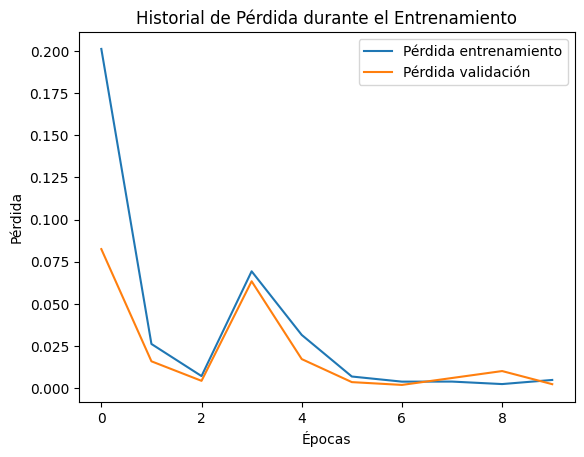

In [7]:
# 7. Curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Historial de Pérdida durante el Entrenamiento')
plt.show()

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.72      0.57      0.64       448

    accuracy                           0.95      6393
   macro avg       0.84      0.78      0.81      6393
weighted avg       0.95      0.95      0.95      6393



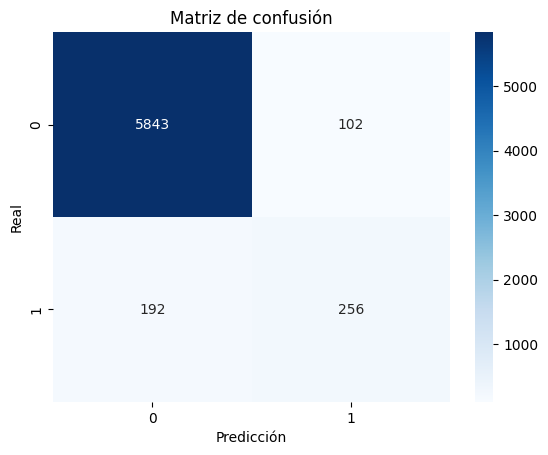

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Generar predicciones (con umbral de 0.5)
#y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred = (RNN_model.predict(x_test) > 0.3).astype("int32")  # umbral ajustado


# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión (opcional)
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [9]:
# Guardar el modelo entrenado
RNN_model.save("RNN_model_final.h5")